In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Periodic Boundary Conditions

To take periodic boundry condition into account, matrices $\mathcal{A}, \mathcal{B}$ and $\mathcal{G}$ should be modified as follows

$$
\begin{equation*}
    \mathcal{A} = \frac{1}{\Delta x^2}
    \begin{bmatrix}
        -2 & 1 & 0 & 0 & \dots & 1 \\
        1 & -2 & 1 & 0 & \dots & 0 \\
        0 & 1 & -2 & 1 & \dots & 0 \\
        \dots & \dots & \dots & \dots & \dots & \dots \\
        0 & \dots & 0 & 1 & -2 & 1 \\
        1 & \dots & 0 & 0 & 1 & -2 \\
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
    \mathcal{B} = \frac{1}{12}
    \begin{bmatrix}
        10 & 1 & 0 & 0 & \dots & 1 \\
        1 & 10 & 1 & 0 & \dots & 0 \\
        0 & 1 & 10 & 1 & \dots & 0 \\
        \dots & \dots & \dots & \dots & \dots & \dots \\
        0 & \dots & 0 & 1 & 10 & 1 \\
        1 & \dots & 0 & 0 & 1 & 10 \\
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
    \mathcal{G} = 
    \begin{bmatrix}
        g_N & 0 & 0 & 0 & \dots & 0 \\
        0 & g_2 & 0 & 0 & \dots & 0 \\
        0 & 0 & g_3 & 0 & \dots & 0 \\
        \dots & \dots & \dots & \dots & \dots & \dots \\
        0 & \dots & 0 & 0 & g_{N-1} & 0 \\
        0 & \dots & 0 & 0 & 0 & g_N \\
    \end{bmatrix}
\end{equation*}
$$

# Particle in a box

In [2]:
def bisection(a, b, eps, f):
    """This is just simple bisection function"""
    while abs(b-a) >= eps:
        if f(a)*f(b) <= 0:
            x = (a+b)/2
            if f(a)*f(x) <= 0:
                b = x
            else:
                a = x
    return a

In [3]:
h_bar = 1; m = 1
a = 1
dx = 0.01
E = lambda n: (n**2 * np.pi**2 * h_bar**2) / (8*m*a**2)
for i in range(1,5):
    print("E for n={} : {}".format(i,E(i)))

E for n=1 : 1.2337005501361697
E for n=2 : 4.934802200544679
E for n=3 : 11.103304951225528
E for n=4 : 19.739208802178716


In [4]:
V = lambda x: 0
    
g = lambda x, E_n: 2*(V(x) - E_n)

In [5]:
def schroedinger(E_ana):
    xs = np.arange(-a, a+dx, dx)
    N = xs.size
    psi = np.zeros(N)
    psi_prime = np.zeros(N)
    psi_prime[0] = E_ana
    
    for i in range(0,N-1):
        psi_prime[i+1] = psi_prime[i] + g(xs[i], E_ana)*psi[i]*dx
        psi[i+1] = psi[i] + psi_prime[i]*dx
    end_value = psi[-1]
    return end_value

In [6]:
print("%.7f" %bisection(E(1)-1, E(1)+1, 0.00001, schroedinger))
print("%.7f" %bisection(E(2)-1, E(2)+1, 0.00001, schroedinger))
print("%.7f" %bisection(E(3)-1, E(3)+1, 0.00001, schroedinger))
print("%.7f" %bisection(E(4)-1, E(4)+1, 0.00001, schroedinger))

1.2338989
4.9380447
11.1197616
19.7912718


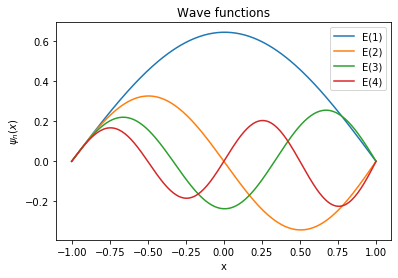

In [7]:
def wave(n):
    """Function to calculate Schrödinger equation; Uses Euler Method"""
    xs = np.arange(-a, a+dx, dx)
    N = xs.size
    psi = np.zeros(N)
    psi_prime = np.zeros(N)
    psi_prime[0] = 1
    bis = bisection(E(n)-1, E(n)+1, 0.000001, schroedinger)
    
    for i in range(0,N-1):
        psi_prime[i+1] = psi_prime[i] + g(xs[i], bis)*psi[i]*dx
        psi[i+1] = psi[i] + psi_prime[i]*dx
    plt.plot(xs, psi, label="E("+str(n)+")")
    
for i in range(1,5):
    wave(i)
    
plt.title("Wave functions")
plt.legend()
plt.xlabel("x")
plt.ylabel("$\psi_n(x)$")
plt.show()

# Quantum Harmonic oscillator